In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,\
	confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [51]:
csv_name = "bills.csv"
df = pd.read_csv(csv_name)
df.head()
df.columns

Index(['Age (years)', 'Blood Pressure', 'Blood Sugar', 'Diabetic',
       'Medical Bill (INR)'],
      dtype='object')

In [52]:
target_variable = 'Diabetic' 
selected_features = ['Age (years)', 'Blood Pressure', 'Blood Sugar',]

# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

# scaler = StandardScaler()

# # Fit the scaler to the selected features
# scaler.fit(df_selected)

# Transform the selected features
scaled_features = df[selected_features]

# Create a new DataFrame with the scaled features
df_feat = pd.DataFrame(scaled_features, columns=selected_features)

df_feat.head()

,Age (years),Blood Pressure,Blood Sugar
0,43,91,105
1,71,132,150
2,50,101,128
3,53,99,126
4,12,73,99


In [53]:

X_train, X_test,\
	y_train, y_test = train_test_split(scaled_features,
									df[target_variable],
									test_size=0.20)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[36  4]
 [ 6 54]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.93      0.90      0.92        60

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



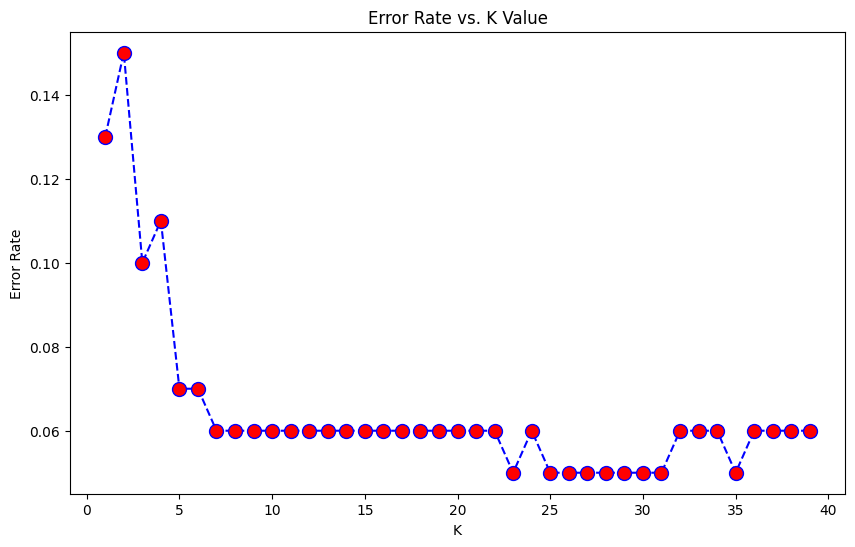

Minimum error rate is at K: 23


In [60]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Find the index with the minimum error rate
min_error_rate_idx = np.argmin(error_rate)

print(f"Minimum error rate is at K: {min_error_rate_idx + 1}")



In [62]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 3')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 3
Confusion Matrix
[[36  4]
 [ 6 54]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.93      0.90      0.92        60

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [70]:
# Assuming new_data is your new data in the same format as your training data
new_data = pd.DataFrame({
    'Age (years)': [58],
    'Blood Pressure': [101],
    'Blood Sugar': [112]
})
# scaled_new_data = scaler.transform(new_data[selected_features])

# Use the trained model to make predictions
new_predictions = knn.predict(new_data)

print(new_predictions)

[1]


Use below cell for predictions

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,\
	confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(scaled_features, df[target_variable])

new_data = pd.DataFrame({
    'Age (years)': [45],
    'Blood Pressure': [97],
    'Blood Sugar': [111]
})
scaled_new_data = scaler.transform(new_data[selected_features])

# Use the trained model to make predictions
new_predictions = knn.predict(scaled_new_data)

print(new_predictions)